In [1]:
print("Imports")

import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt

Imports


In [3]:
print("Reading CSV file")
df = pl.read_csv("../../data/interim/cleaned_house_data_v1_pl.csv")
print(df.head())

Reading CSV file
shape: (5, 7)
┌─────────┬──────┬──────────┬───────────┬────────────┬────────────┬───────────┐
│ price   ┆ sqft ┆ bedrooms ┆ bathrooms ┆ location   ┆ year_built ┆ condition │
│ ---     ┆ ---  ┆ ---      ┆ ---       ┆ ---        ┆ ---        ┆ ---       │
│ i64     ┆ i64  ┆ i64      ┆ f64       ┆ str        ┆ i64        ┆ str       │
╞═════════╪══════╪══════════╪═══════════╪════════════╪════════════╪═══════════╡
│ 495000  ┆ 1527 ┆ 2        ┆ 1.5       ┆ Suburb     ┆ 1956       ┆ Good      │
│ 752000  ┆ 2526 ┆ 3        ┆ 2.5       ┆ Downtown   ┆ 1998       ┆ Excellent │
│ 319000  ┆ 1622 ┆ 2        ┆ 1.5       ┆ Rural      ┆ 1975       ┆ Fair      │
│ 1210000 ┆ 3102 ┆ 4        ┆ 3.0       ┆ Waterfront ┆ 2005       ┆ Excellent │
│ 462000  ┆ 1835 ┆ 2        ┆ 2.0       ┆ Urban      ┆ 1982       ┆ Good      │
└─────────┴──────┴──────────┴───────────┴────────────┴────────────┴───────────┘


In [8]:
print("Look up shape and data description")
print(df.shape)
df.describe()

Look up shape and data description
(84, 7)


statistic,price,sqft,bedrooms,bathrooms,location,year_built,condition
str,f64,f64,f64,f64,str,f64,str
"""count""",84.0,84.0,84.0,84.0,"""84""",84.0,"""84"""
"""null_count""",0.0,0.0,0.0,0.0,"""0""",0.0,"""0"""
"""mean""",628559.52381,2191.5,2.857143,2.190476,null,1982.047619,null
"""std""",359167.825027,650.017117,0.852252,0.828356,null,19.501563,null
"""min""",249000.0,1350.0,2.0,1.0,"""Downtown""",1947.0,"""Excellent"""
"""25%""",375000.0,1700.0,2.0,1.5,null,1965.0,null
"""50%""",512000.0,2010.0,3.0,2.0,null,1983.0,null
"""75%""",729000.0,2580.0,3.0,2.5,null,1995.0,null
"""max""",1.68e6,3850.0,5.0,4.5,"""Waterfront""",2019.0,"""Poor"""


In [10]:
print("Checking for null values")
df.null_count().sum()

Checking for null values


price,sqft,bedrooms,bathrooms,location,year_built,condition
u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0


Plotting the histogram


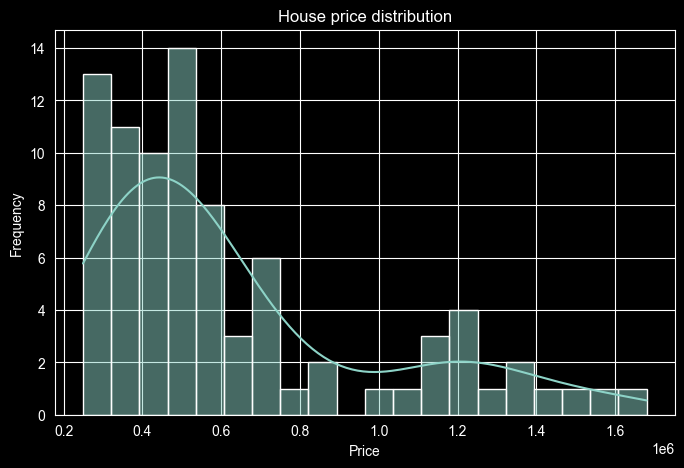

In [13]:
print("Plotting the histogram")
plt.figure(figsize = (8, 5))
sns.histplot(df["price"], kde=True, bins=20)
plt.title("House price distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

In [20]:
print("Looking at numeric features")
df.select(pl.selectors.numeric())

Looking at numeric features


price,sqft,bedrooms,bathrooms,year_built
i64,i64,i64,f64,i64
495000,1527,2,1.5,1956
752000,2526,3,2.5,1998
319000,1622,2,1.5,1975
1210000,3102,4,3.0,2005
462000,1835,2,2.0,1982
…,…,…,…,…
530000,2080,3,2.0,1991
372000,1640,2,1.5,1963
592000,2220,3,2.0,1985


Looking at the feature correlation matrix of numerical values


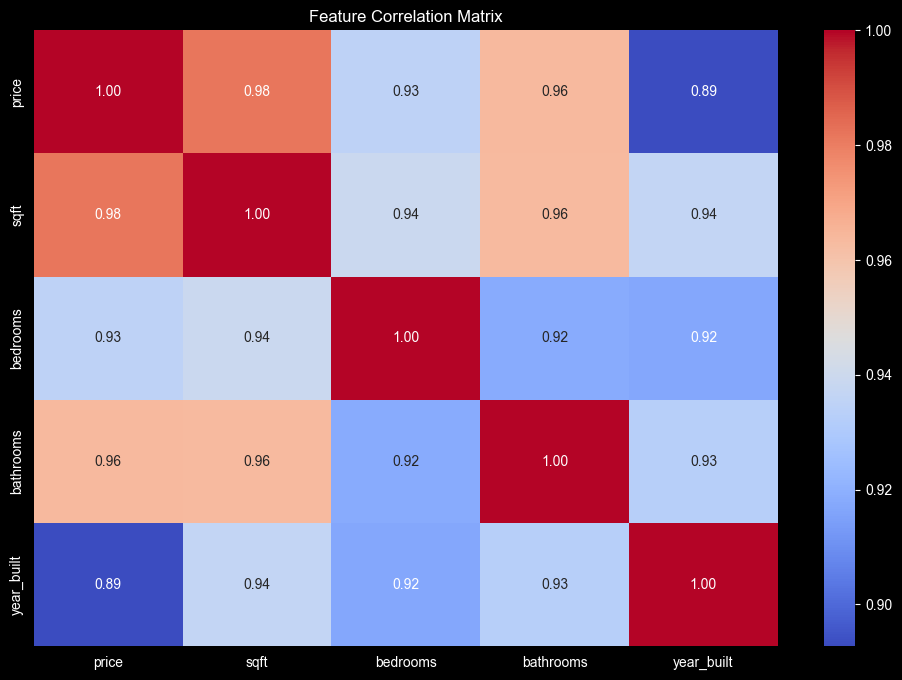

In [23]:
print("Looking at the feature correlation matrix of numerical values")
plt.figure(figsize = (12, 8))
num_df = df.select(pl.selectors.numeric())
corr = num_df.corr()
labels = num_df.columns

sns.heatmap(
    corr.to_numpy(),
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    xticklabels=labels,
    yticklabels=labels
)

plt.title('Feature Correlation Matrix')
plt.show()

Since price and sqft seem to have a high strong correlation, we'll look at the scatter plot


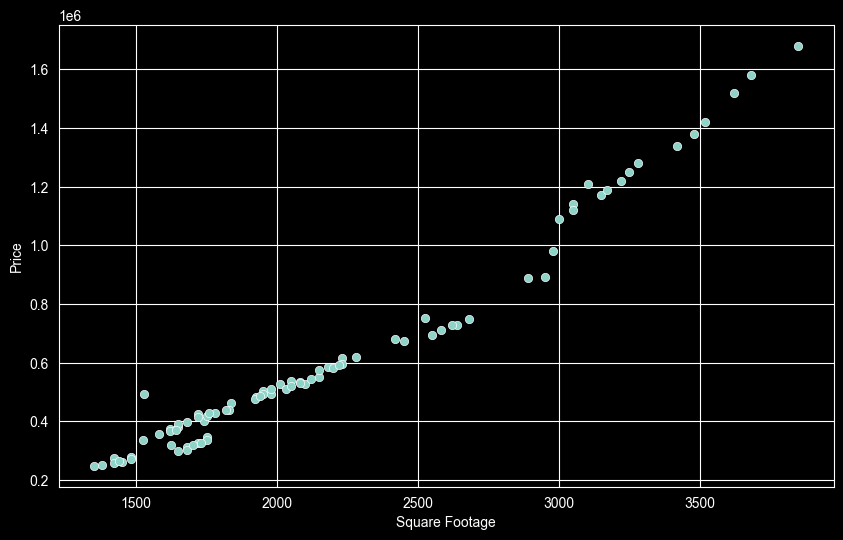

In [24]:
print("Since price and sqft seem to have a high strong correlation, we'll look at the scatter plot")
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="sqft",
    y="price",
    data = df)

plt.xlabel('Square Footage')
plt.ylabel('Price')
plt.show()

Bar chart to see how many houses exist in each location


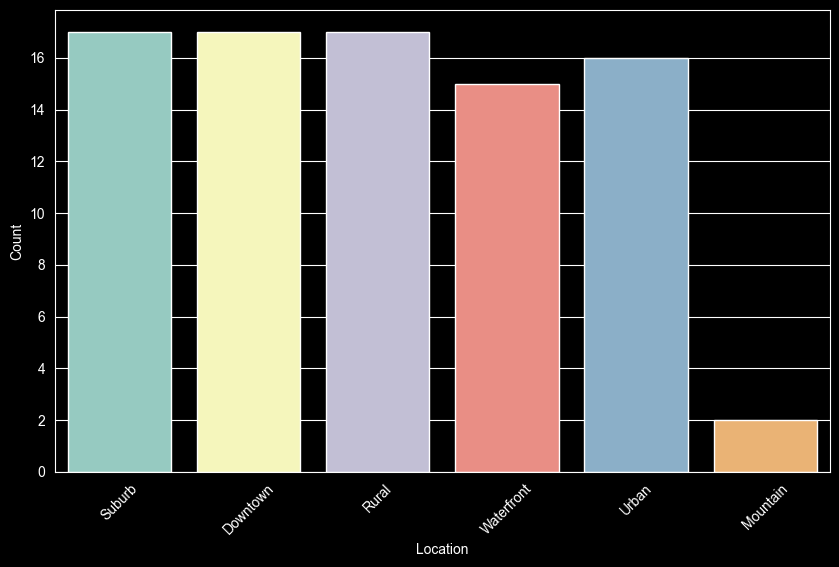

In [30]:
print("Bar chart to see how many houses exist in each location")
plt.figure(figsize=(10, 6))

loc = df["location"].to_numpy()

sns.countplot(x=loc)

plt.xlabel("Location")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

Bar chart showing how average house price varies by bedroom count


<Figure size 1000x600 with 0 Axes>

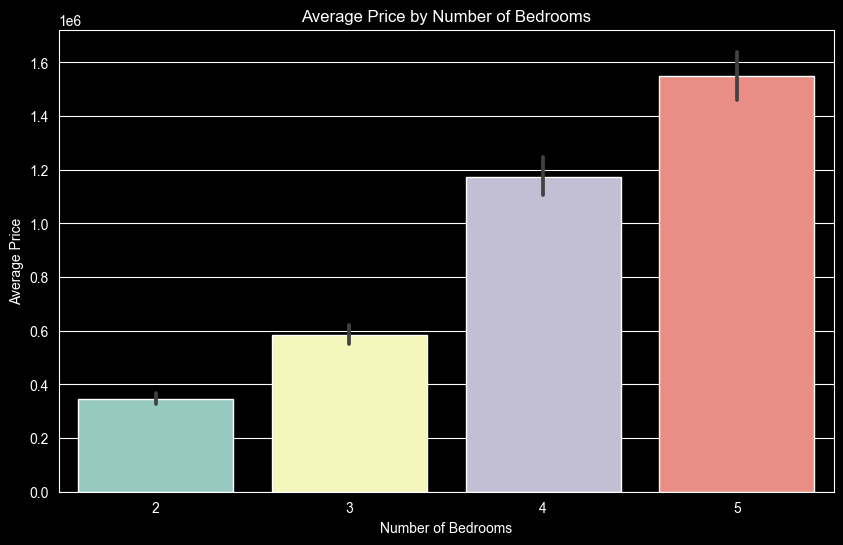

In [33]:
print("Bar chart showing how average house price varies by bedroom count")
plt.figure(figsize=(10, 6))
# 🛏️ Bar chart showing how average house price varies by bedroom count
plt.figure(figsize=(10, 6))
sns.barplot(x=df['bedrooms'].to_numpy(), y=df['price'].to_numpy())
plt.title('Average Price by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Price')
plt.show()